# Pythonシミュレーション


## １．質量一定

- チリの質量一定
- ランダム配置，ランダム初速度
- 重力の影響を受けて移動

使用関数

- 初期配置関数
- 重力から力を計算する関数（上限を設けること）
- ルンゲクッタで積分する関数
- 居なくなる粒子を排除する関数

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [125]:

class constmass_spacemodel:
    # constructor
    def __init__(self,dust_number=10000,mass = 1.0, G = 1.0,simlen = 1e3, simstep = 1e-3, normalized_speed = 1,boxsize = 1,boxlimit = 5):
        self.dust_number = dust_number
        self.mass = mass
        self.G = G
        self.simlen = simlen
        self.simstep = simstep
        self.current_step = 0
        self.speed = normalized_speed
        self.initial_positioning(boxsize,boxlimit)
        
    def initial_positioning(self,boxsize,boxlimit):
        # 箱庭のサイズ
        self.boxsize = boxsize
        # シミュレーション内で許容できるサイズ
        self.boxlimit = boxlimit*boxsize
        # 位置，速度：ガウス分布
        self.dustspos = np.random.randn(self.dust_number,3)
        self.dustsvel = np.random.randn(self.dust_number,3)*self.speed
        self.initpos = self.dustspos
        self.initvel = self.dustsvel
        self.showing()
                        
    def calc_gravityforce(self,pos,index,r_min = 1e-2):
        pos = np.array(pos).reshape(1,3)
        force = np.zeros((1,3))
        dusts = np.delete(self.dustspos,index,axis=0)
        for dust in dusts:
            dust = np.array(dust).reshape(1,3)
            r = np.linalg.norm(dust-pos)
            rvec = (dust-pos)/r
            r_ = max(r,r_min)
            force += rvec*self.G*self.mass*self.mass/r_/r_
        return force
    
    def RungeKutta(self):
        xnew = np.zeros((self.dust_number,3))
        vnew = np.zeros((self.dust_number,3))
        for i in range(self.dust_number):
            x0 = self.dustspos[i,:]
            v0 = self.dustsvel[i,:]
            xk1 = v0  # 
            vk1 = self.calc_gravityforce(x0,i)/self.mass  # a = f/m
            xk2 = v0  + 0.5*self.simstep*vk1# 
            vk2 = self.calc_gravityforce(x0+0.5*self.simstep*xk1,i)/self.mass  # a = f/m
            xk3 = v0  + 0.5*self.simstep*vk2# 
            vk3 = self.calc_gravityforce(x0+0.5*self.simstep*xk2,i)/self.mass# a = f/m
            xk4 = v0 + self.simstep*vk3 # 
            vk4 = self.calc_gravityforce(x0+self.simstep*xk3,i)/self.mass # a = f/m
            xnew[i,:] = x0 + self.simstep/ 6 *(  xk1 + 2*xk2 + 2*xk3 + xk4 )
            vnew[i,:] = v0 + self.simstep/ 6 *(  vk1 + 2*vk2 + 2*vk3 + vk4 )
        
        self.dustspos = xnew
        self.dustsvel = vnew
        
    def delete_dusts(self):
        # box からはみ出した粒子がいる場合 シミュレーションから削除する
        isinside = np.any(np.abs(self.dustspos) < self.boxlimit, axis=1)
        self.dustspos = self.dustspos[isinside,:]
        self.dustsvel = self.dustsvel[isinside,:]
        self.dust_number,_ = self.dustspos.shape

    def sim(self,simlen=None,showflag=False,interval = 1):
        if simlen == None:
            simlen = self.simlen
        while self.current_step < simlen:
            self.RungeKutta()
            self.delete_dusts()
            self.current_step += 1
            if showflag and not self.current_step % interval:
                self.showing()
                    
    def showing(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.dustspos[:,0],self.dustspos[:,1],self.dustspos[:,2])
        plt.title(str(self.current_step)+" step")
        plt.show()

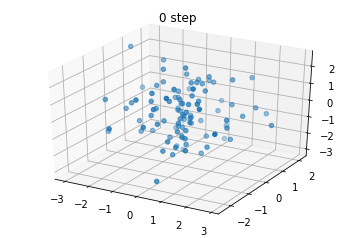

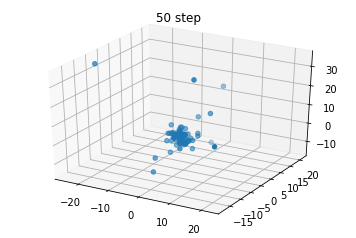

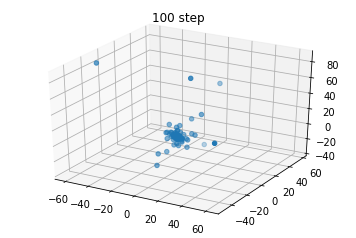

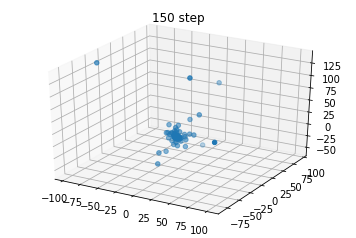

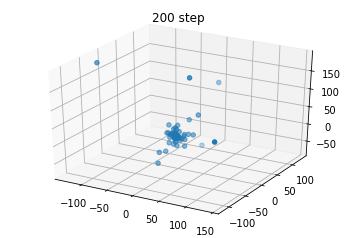

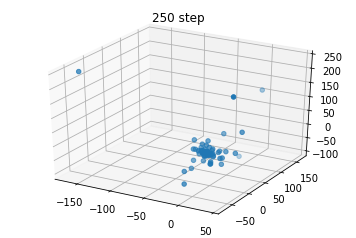

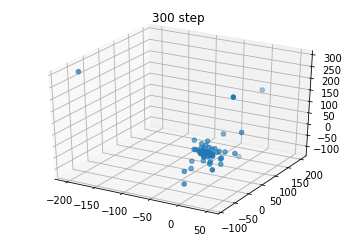

KeyboardInterrupt: 

In [126]:
cm = constmass_spacemodel(dust_number=100,normalized_speed=1,mass=5,simstep=1e-2,boxlimit=100)
cm.sim(300,showflag=True,interval = 50)

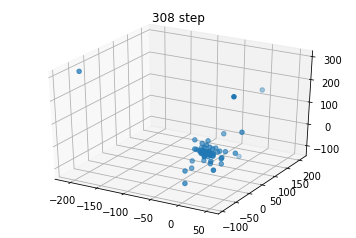

In [127]:
cm.showing()

In [130]:
np.savetxt('init.csv',cm.initpos)
np.savetxt('300step.csv',cm.dustspos)


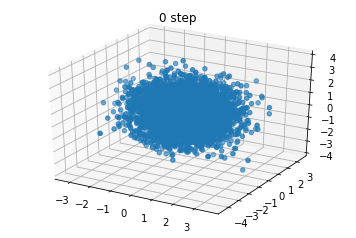

In [ ]:
cm2 = constmass_spacemodel(dust_number=5000,normalized_speed=0.5,mass=5,simstep=1e-2,boxlimit=100)
cm2.sim(300,showflag=True,interval = 50)